# Luminance and Colors

Author: Dr. Umberto Michelucci (umberto.michelucci@hslu.ch)

The luminance is not defined in a straightforwawrd and is not define uniquely. A possible formula that can be used, and that is demonstrated in this notebooks is the following.

$$
    \textrm{Luminance} = \frac{299\cdot \textrm{Red}+587\cdot \textrm{Green}+114\cdot \textrm{Blue}}{1000}
$$

That is defined as a function below.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from more_itertools import sort_together

In [66]:
step = 20
colors = []
for red in np.arange (0,255,step): # we plot 50 colors between white and black
    for green in np.arange (0,255,step): # we plot 50 colors between white and black
        for blue in np.arange (0,255,step): # we plot 50 colors between white and black
            colors.append((red/255.0, green/255.0, blue/255.0))

In [67]:
def luminance(RGB):
    return (RGB[0]*299.0+RGB[1]*587+RGB[2]*114)/1000.0

luminance_list = [luminance(x) for x in colors]

In [68]:
luminance_np = np.array(luminance_list)
colors_np = np.array(colors)

sort = np.argsort(luminance_np)
colors_sorted = colors_np[sort]
luminance_sorted = luminance_np[sort]


## Plot of the colors sorted by their luminance

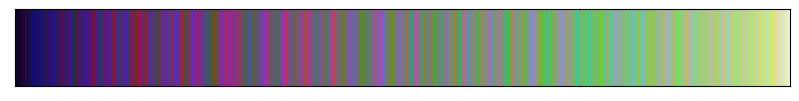

In [69]:
fig = plt.figure(figsize = (10,1))
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for i in range(len(colors)):
    rect = matplotlib.patches.Rectangle((i,0), 1, 1, color=colors_sorted[i])
    ax.add_patch(rect)
ax.set_xlim(0, len(colors))
ax.set_ylim(0,1)
plt.show()

## Transformation of the image to B&W by using luminance as the only channel

Now let's use luminance as the only channel and plot it as a gray level image.

In [87]:
# We will create a fake image as the one above by defining an array and putting values for the pixels as the luminance.
image = np.zeros((10,len(colors), 1)) # 10 pixel height
print(image.shape)
for pixel in range(len(colors)):
    image[ 0:10, pixel, 0] = luminance_sorted[pixel]

(10, 2197, 1)


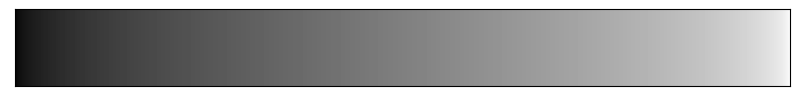

In [92]:
fig = plt.figure(figsize = (10,1))
ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(image, aspect = 'auto', cmap = 'gray')
